
# <center> Econometria Financiera <center>

<h2><center>Ejercicios Práctica - Tarea #2</center></h2>

<center> Ketherine Jimenez 1106918 - Aura Gonzalez 1106920 - Eddily Sanchez 1096853<center>
<center>ProShares Hedge Replication ETF [UV6939].<center>

## Setup

In [84]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass
import warnings
sns.set()
from statsmodels.regression.rolling import RollingOLS

from portfolio import *

import statsmodels.api as sm
from scipy import stats

from tabulate import tabulate

from numpy.linalg import norm 

pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Data

In [57]:
path = 'proshares_analysis_data.xlsx'
df_hedge_rep = pd.read_excel(path, sheet_name='hedge_fund_series').set_index('date')
df_merrill_facs = pd.read_excel(path, sheet_name='merrill_factors').set_index('date')
df_multi_asset = pd.read_excel(path, sheet_name='other_data').set_index('date')

## ProShares Hedge Replication ETF

### 1. El producto de ProShares ETF

    
  ***1.“Alternive ETFs” (ETFs Alternativas)***
  
Describa dos tipos de inversiones referidas por este término en la lectura.
  
  
  
<br><br><br>
    
  ***2.Hedge Funds***
    
    a) Usando solo información de caso, ¿cuáles son las dos medidas por las cuales los hedge funds son una inversión atractiva?
    
Como se puede ver en el Exhibit , slide 9-10, el indice HFRI tiene un Sharpe RAtio mas alto que S&P500 (.84 vs .41), asi como un drawdown significativamente mas pequeño. El Slide 7 tambien resalta que HFRI no esta perfectamente correlacionado con los activos equities (acciones) y bonds (bonos), por lo que provee beneficios de diversificación a nivel de construcción de portafolio.
    
    b) ¿Cuáles son los beneficios de invertir en hedge fund via un ETF en comparación a invertir directamente en estos?

<br><br><br>
    ***3.The benchmark (Indices de Referencia)***
    
    
    a) ¿Qué tan bien el Merril Lynch Factor Model (MLFM) replica el índice HFRI?
    b) ¿En qué factores el Merrill Lynch Factor Model tiene la mayor beta?
    c) ¿Cuáles serían las preocupaciones más grandes a la hora de evaluar el intendo de repiblica del índice HFRI por parte del Merryll Lynch Factor Model?


    

    
    


### 2 Analizando la Data

Utilice el archivo “proshares_analysis_data.xlsx”. El archivo tiene data mensual de los índices financieros y ETFs desde agosto del 2021 hasta septiembre 2021.


***1. Para las series en el sheet “hedge_fund_series”, reporte los siguientes estadísticos:***
 
    a) Media de Retornos
    b) Volatilidad de los Retornos.
    c) Sharpe Ratio

Anualice los estos estadísticos.

In [58]:
# Calculemos los excesos de retorno

hedge_rep_portfolio_names = ['HFRIFWI Index', 'MLEIFCTR Index',
    'MLEIFCTX Index', 'HDG US Equity', 'QAI US Equity']

# Substrayendo tasa libre de riesgo:
USGG3M = df_merrill_facs['USGG3M Index']
df_hedge_rep_excess = df_hedge_rep.subtract(USGG3M, axis=0)



In [59]:
Performance = performanceMetrics(df_hedge_rep_excess,12)
Performance.style.set_caption('Tabla 1:  Resumen Estadístico del periodo 2011-2021 (Anualizado)')

,Mean,Vol,Sharpe,Min,Max
HFRIFWI Index,0.045074,0.061717,0.730323,-0.090835,0.058543
MLEIFCTR Index,0.033110,0.053979,0.613385,-0.053285,0.058826
MLEIFCTX Index,0.031619,0.053816,0.587539,-0.052435,0.058746
HDG US Equity,0.022389,0.056506,0.396227,-0.059242,0.058245
QAI US Equity,0.019780,0.045583,0.433930,-0.056397,0.034129




***2. Para las series de tiempo en el sheet “hedge_fund_series”, reporte los siguientes estadísticos relacionados con riesgo de cola:***

    a) Coeficiente de Asimetría.
    b) Exceso de Curtosis (en exceso de 3).
    c) VaR (.05) – el quinto quintil (percentil 5) de los retornos históricos.
    d) CVaR(.05) – la media de los retornos en o por debajo de quinto quintil.
    e) Maximum Drawdown – incluya las fechas de max/min/recovery dentro del periodo del max drawdown.

In [80]:
#coeficiente de asimetria
df_hedge_rep_excess.skew()


HFRIFWI Index    -1.0758
MLEIFCTR Index   -0.1791
MLEIFCTX Index   -0.1645
HDG US Equity    -0.1675
QAI US Equity    -0.5185
dtype: float64

In [81]:
#Exceso de curtosis
df_hedge_rep_excess.kurtosis()

HFRIFWI Index    6.5384
MLEIFCTR Index   2.4399
MLEIFCTX Index   2.3882
HDG US Equity    2.5834
QAI US Equity    2.5999
dtype: float64

In [79]:
# Calculate the VaR 
VaR_90 = df_hedge_rep_excess['HDG US Equity'].quantile(0.1)
VaR_95 = df_hedge_rep_excess['HDG US Equity'].quantile(0.05)
VaR_99 = df_hedge_rep_excess['HDG US Equity'].quantile(0.01)


print (tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers = ['Confidence Level', 'Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0156157
95%                      -0.0285294
99%                      -0.0339098


In [89]:
# Compute the 95% VaR using the .ppf()
VaR_95 = norm.ppf(0.95, loc = 1, scale = 0.5 )


AttributeError: 'function' object has no attribute 'ppf'

In [62]:
#Maximun Drawdown

maximumDrawdown(df_hedge_rep_excess)

,Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
HFRIFWI Index,-0.1274,2018-01-31,2020-03-31,2020-08-31,943 days
MLEIFCTR Index,-0.0867,2019-12-31,2020-03-31,2020-11-30,335 days
MLEIFCTX Index,-0.0859,2019-12-31,2020-03-31,2020-11-30,335 days
HDG US Equity,-0.0961,2018-01-31,2020-03-31,2020-11-30,1034 days
QAI US Equity,-0.0864,2018-01-31,2020-03-31,2020-08-31,943 days



***3. Para las series de tiempo en el sheet “hedge_fund_series”, realice una regresión lineal en contra de SPY (se encuentra en el sheet “merrill_factors”). Incluya intercepto. Reporte los siguientes estadísticos:***

    a) Market Beta.
    b) Treynor Ratio.
    c) Information Ratio.
    
 Analice los estadísticos.

In [63]:
# Vamos a utilizar el statsmodels package de python


#Definimos y
y = (df_merrill_facs['SPY US Equity'])

# Definimos los factores X y utilizamos .add_constant() para agregar constante a la regresión. 
# Si no utilizamos .add_constant la regresión no tendrá constante.
X = sm.add_constant(df_hedge_rep)
static_model = sm.OLS(y,X).fit()

In [64]:
# utilizamos el comando .params.to_frame() para mostrar parametros de regresión 
static_model.params.to_frame('Parametros de la Regresión')

,Parametros de la Regresión
const,0.0036
HFRIFWI Index,0.3638
MLEIFCTR Index,9.7839
MLEIFCTX Index,-8.1266
HDG US Equity,-0.2269
QAI US Equity,0.6079


In [65]:
OLS_METRICS = get_ols_metrics(df_merrill_facs[['SPY US Equity']],df_merrill_facs,12)
OLS_METRICS.style.set_caption('Tabla 2: Resumen Estadístico de la regresión lineal en contra de SPY 2011-2021')

,alpha,SPY US Equity,r-squared,Treynor Ratio,Mkt Corr,Info Ratio
SPY US Equity,0.000000,1.000000,1.000000,0.147548,1.000000,nan
USGG3M Index,0.005859,-0.001007,0.003506,-5.673148,0.059214,2.550715
EEM US Equity,-0.102123,0.986917,0.531035,0.044072,0.728721,-0.813454
EFA US Equity,-0.070531,0.936006,0.742602,0.072194,0.861743,-0.945540
EUO US Equity,0.106914,-0.387362,0.112421,-0.128458,0.335292,0.725671
IWM US Equity,-0.048441,1.221265,0.776593,0.107884,0.881245,-0.546322


### 4. Rendimiento Relativo.

***Discuta los estadísticos anteriores, que estos nos dicen de:***

    a) ¿Qué diferencias entre SPY y las series de retornos de Hedge Funds?
    b) ¿Cuál tiene un mejor rendimiento entre HDG y QAL?
    c) Entre HDG y ML captura las propiedades más notables de HFRI.


**Solución: Primero, notamos algunas cosas sobre la muestra completa:

- HDG tiene una media baja, alta volatilidad, y un SR por debajo de sus competidores, QAI, sobre la muestra completa. Además, QAI, tiene una correlación mas baja con S&P 500 (SPY).

- El indeice HFRI tiene un SR mas alto que los indices ML, y un SR mas grande que los replicadores, HDG y QAI.


En los años años posteriores 2014-2020 notamos lo siguiente:

- Los Sharpe Ratios, market betas, correlacion son similares como en el muetra completa.
- QAI tiene mejore resultados que HDG desde 2014 tanto exceso de retornos como Sharpe Ratio.
- El índice MLEIFCTX continua haciendo un buen trabajo siguiendo las propiedades de MLEIFCTR, por lo menos obsevando la media, volatilidad y market beta de los retornos
- SPY tiene mayor exceso de retornos que cualquier otro instrumento o índice, aunque tiene una volatilidad mucho mayor. Aun así, SPY tiene el mayor Sharpe Ratio.

***5. Reporte la matriz de correlación de estos activos.***
     
     a. Muestre las correlaciones usando un mapa de calor.
     b. ¿Qué series tienen la correlación más baja y alta?

MIN Correlation pair is ('QAI US Equity', 'HDG US Equity')
MAX Correlation pair is ('MLEIFCTX Index', 'MLEIFCTR Index')


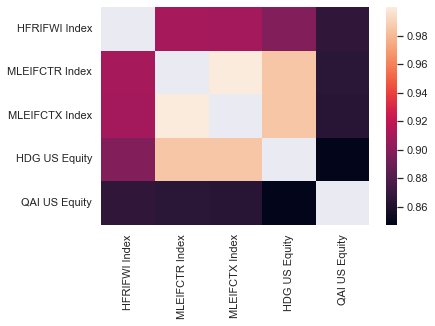

In [14]:
corrmat = df_hedge_rep.corr()

#ignore self-correlation
corrmat[corrmat==1] = None
sns.heatmap(corrmat)

corr_rank = corrmat.unstack().sort_values().dropna()
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}')
print(f'MAX Correlation pair is {pair_max}')


***6. Replique el índice HFRI con los seis factores listados en el sheet “merril_factor”. Incluya una constante, y realice la regresión sin restricciones:***

<br><br>
$$r_t^{hfri} = \alpha^{merr} + x_t^{merr} \beta^{merr} +\epsilon_t^{merr}$$
$$r_t^{hfri->merr} = \hat{\alpha^{merr}} + x_t^{merr} \hat{\beta^{merr}} +\epsilon_t^{merr}$$
 
Note que la segunda ecuación es solo nuestra notación para la replicación. 

a. Reporte el intercepto y los betas.

b. ¿Son estos betas tamaño de posiciones reales, o acaso necesitan de posicione long-short grandes?

c. Reporte el R-cuadrado. 

d. Reporte la volatilidad de ε^merr. (Tracking Error/Error de Seguimiento).

In [95]:
# Vamos a utilizar el statsmodels package de python

#Definimos y
y = (df_hedge_rep['HFRIFWI Index'])

# Definimos los factores X y utilizamos .add_constant() para agregar constante a la regresión. 
# Si no utilizamos .add_constant la regresión no tendrá constante.
X = sm.add_constant(df_merrill_facs)
static_model1 = sm.OLS(y,X).fit()

In [96]:
# utilizamos el comando .params.to_frame() para mostrar parametros de regresión 
static_model.params.to_frame('Parametros de la Regresión')

,Parametros de la Regresión
const,0.0011
SPY US Equity,0.0720
USGG3M Index,-0.4006
EEM US Equity,0.0722
EFA US Equity,0.1063
EUO US Equity,0.0224
IWM US Equity,0.1309


In [97]:
# R Cuadrado de la Regresión 
round(static_model1.rsquared,4)

0.8557

In [98]:
# utilizamos .resid.std() para encontrar la desviación estandar de los residuos y analuzamos. 
round(static_model1.resid.std() * np.sqrt(12),4)

0.0234

El tranking error es de un 2.34%, lo que nos dice que es una gestión con algo de riesgo, pero controlada.

***7. Ahora vamos a evaluar el rendimiento fuera de muestra (out of sample performance).***

Empezando con t = 61 meses de la muestra, haga los siguiente:
• Use los 60 meses anteriores para estimar la regresión del ejercicio 6. Esto nos va de los estimados en el
𝑚𝑒𝑟𝑟 ̂ 𝑚𝑒𝑟𝑟 tiempo-t de los parámetros de la regresión, 𝛼̂𝑡 y 𝛽𝑡 .
• Use los parámetros estimados de la regresión, así como los valores 𝑥𝑚𝑒𝑟𝑟, para calcular el valor 𝑡
replicado en el tiempo-t5 eso es, con respecto a los estimados de la regresión, construya el “out-of- sample” (OOS).

$$r_t^{hfri->merr:OOS} = \hat{\alpha_t^{merr}} + (x_t^{merr})^{'} \hat{\beta_t^{merr}}$$

• Luego adelántese a t=62, y luego use t=2 hasta t=61 para la estimación. Re-itere los pasos anteriores usando la toda la data dispobinle. Por ender, estamos realizando una Rolling Regression (regresión movil) de 60 meses para cada punto en el tiempo. 6

¿Qué tan bien es el rendimiento de 𝑟̂^h𝑓𝑟𝑖→𝑚𝑒𝑟𝑟:𝑂𝑂𝑆, particularmente con la variable objetivo, 𝑟̂^h𝑓𝑟𝑖?

In [101]:
# Utilzaremos la fución rolling regression para realizar regresiones 

# Primero determinaremos la cantidad de meses de data entre 2011 hasta 2015.

w = len(y[:'2016'])
print('Cantidad de Meses: ',w)

Cantidad de Meses:  65


In [11]:
# utilizamos la función RollingOLS sobre la misma data utilizada. 

model = RollingOLS(y,X,window=w)
rolling_betas = model.fit().params.copy()
rolling_betas

,const,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
date,,,,,,,
2011-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-05-31,-0.0018,0.0765,1.3365,0.1044,0.1194,0.0481,0.1291
2020-06-30,-0.0013,0.0658,1.0224,0.1149,0.1139,0.0506,0.1339
2020-07-31,-0.0011,0.1164,0.8402,0.1310,0.0460,0.0207,0.1288


In [13]:
# Mostrando Resultados 

# replicación rolling In Sample
rep_IS = (rolling_betas * X).sum(axis=1,skipna=False)

# Replicación rolling Out of Sample
rep_OOS = (rolling_betas.shift() * X).sum(axis=1,skipna=False)
replication = df_hedge_rep[['HFRIFWI Index']].copy()

# Creamos columunas
replication['Static-IS-Int'] = static_model.fittedvalues
replication['Rolling-IS-Int'] = rep_IS
replication['Rolling-OOS-Int'] = rep_OOS
replication

,HFRIFWI Index,Static-IS-Int,Rolling-IS-Int,Rolling-OOS-Int
date,,,,
2011-07-31,0.0023,-0.0082,NaN,NaN
2011-08-31,-0.0321,-0.0301,NaN,NaN
2011-09-30,-0.0389,-0.0382,NaN,NaN
2011-10-31,0.0269,0.0467,NaN,NaN
2011-11-30,-0.0135,-0.0028,NaN,NaN
...,...,...,...,...
2020-05-31,0.0238,0.0183,0.0188,0.0171
2020-06-30,0.0199,0.0126,0.0149,0.0140
2020-07-31,0.0297,0.0160,0.0194,0.0137


In [15]:
# Correlación entre HFRIFWI y las diferentes metodologias de replicas utilizadas. Esto lo podemos utilizar para identificar que
# estrategia de estimación mantienen una mejor correlación con el objetivo a replicar HFRIFWI. 
replication.corr()

,HFRIFWI Index,Static-IS-Int,Rolling-IS-Int,Rolling-OOS-Int
HFRIFWI Index,1.0000,0.9335,0.9751,0.9314
Static-IS-Int,0.9335,1.0000,0.9881,0.9922
Rolling-IS-Int,0.9751,0.9881,1.0000,0.9843
Rolling-OOS-Int,0.9314,0.9922,0.9843,1.0000


<AxesSubplot:xlabel='date'>

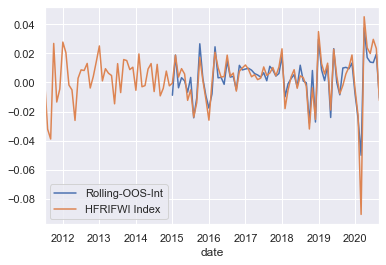

In [16]:
replication[['Rolling-OOS-Int','HFRIFWI Index']].plot()

8. Nosotros estimamos las replicaciones usando intercepto. Intentemos la estimación del problema 6 pero esta vez sin intercepto.Reporte:
a. Los betas de la regresión. ¿Cómo se comparan con las estimaciones de beta con intercepto?
b. La media de los valores estimados, 𝑟̌h𝑓𝑟𝑖. ¿Cómo se compara con la media de HFRI?7 𝑡?
c. la correlación de los valores estimados 𝑟̌h𝑓𝑟𝑖con HFRI. ¿Cómo esta correlación se compara con los 𝑡 valores estimados con intercepto, 𝑟̂h𝑓𝑟𝑖? 𝑡?
¿Cómo piensa usted que Merrill y ProShares estiman sus replicadores, con intercepto o sin intercepto?